In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch

from dataset import LamaHDataset
from torch_geometric.utils import to_networkx
from tqdm import tqdm

In [2]:
DATASET_PATH = "/scratch/kirschstein/LamaH-CE"

In [3]:
dataset = LamaHDataset(DATASET_PATH, years=[2000])

Loading dataset into memory...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [02:21<00:00,  2.66it/s]


In [4]:
data = dataset[0]
print("# vertices:", data.num_nodes)
print("# edges:", data.num_edges)
print("# vertex features:", data.num_node_features)
print("# edge features:", data.num_edge_features)
print("directed graph?", data.is_directed())
print("isolated vertices?", data.has_isolated_nodes())
print("self-loops?", data.has_self_loops())
print("valid?", data.validate())

# vertices: 375
# edges: 374
# vertex features: 5
# edge features: 3
directed graph? True
isolated vertices? False
self-loops? False
valid? True


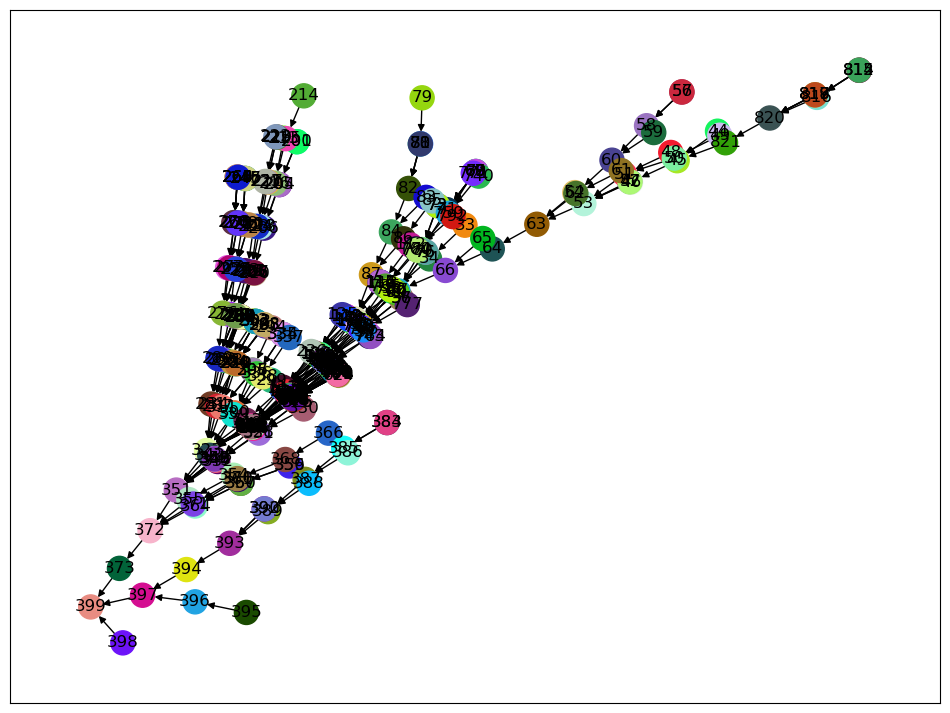

In [5]:
plt.figure(figsize=(12, 9))
graph = nx.relabel_nodes(to_networkx(data, to_undirected=False), dict(enumerate(dataset.gauges)))
nx.draw_networkx(graph, pos=nx.drawing.kamada_kawai_layout(graph), with_labels=True,
                 node_color=[tuple(torch.rand(3)) for _ in range(375)])

In [6]:
def longest_path(start_id, adj):
    predecessors = list(adj[adj["NEXTDOWNID"] == start_id]["ID"])
    if not predecessors:
        return 0
    else:
        return 1 + max(longest_path(pre, adj) for pre in predecessors)

adj = pd.read_csv(f"{DATASET_PATH}/processed/adjacency.csv")
gauges = list(set(adj["ID"]).union(adj["NEXTDOWNID"]))
print("Longest path length:", max(longest_path(i, adj) for i in range(900)))

Longest path length: 19
